<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_CODEBERTLLM_1E9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path9)

<ipython-input-4-31de1d26f69d>:1: DtypeWarning: Columns (1,2,3,5,6,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path9)


In [5]:

from sklearn.model_selection import train_test_split

In [6]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [7]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [8]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [9]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
5262584,5787580,NaN,NaN,NaN,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN
5262585,5787581,NaN,NaN,NaN,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN
5262586,5787582,NaN,NaN,NaN,"Log.e(TAG, ""Uncaught exception in "" + t + "": ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.e(TAG, ""user_str"" + t + ""user_str"" + Log....",NaN,NaN,NaN
5262587,5787661,NaN,NaN,NaN,registerReceiver(new BroadcastReceiver() {,NaN,NaN,NaN,CWE-925,Improper Verification of Intent by Broadcast R...,NaN,NaN,NaN,1,registerReceiver(new BroadcastReceiver() {,broadcast,VULNERABILITY,Dynamic broadcast receiver found
5262588,5787687,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,browserWebview.getSettings().setJavaScriptEnab...,webview,WARNING,Javascript enabled in Webview


In [10]:
df.shape

(5262589, 18)

In [11]:
df.describe()

,index,CVSS,Vulnerability_status
count,5.262589e+06,37916.000000,5.262589e+06
mean,2.695591e+06,6.792072,1.163705e-02
std,1.594903e+06,1.481854,1.072456e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.315647e+06,7.400000,0.000000e+00
50%,2.649589e+06,7.500000,0.000000e+00
75%,4.065726e+06,7.500000,0.000000e+00
max,5.787687e+06,8.800000,1.000000e+00


In [12]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [13]:
df.nunique()

,0
index,5262589
Description,28
Type,4
Pattern,28
Code,5230030
Severity,4
Input Case,2
CVSS,10
CWE_ID,22
CWE_Desc,23


In [14]:
df['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    5201348
1      61241
Name: count, dtype: int64


In [16]:
df_safe = df[df['Vulnerability_status']==0]

In [17]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [18]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [19]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
5262582,5787578,NaN,NaN,NaN,public LiveData<Boolean> getDatabaseCreated(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public LiveData<Boolean> getDatabaseCreated(),NaN,NaN,NaN
5262583,5787579,NaN,NaN,NaN,return isDatabaseCreated;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return isDatabaseCreated;,NaN,NaN,NaN
5262584,5787580,NaN,NaN,NaN,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN
5262585,5787581,NaN,NaN,NaN,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN
5262586,5787582,NaN,NaN,NaN,"Log.e(TAG, ""Uncaught exception in "" + t + "": ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.e(TAG, ""user_str"" + t + ""user_str"" + Log....",NaN,NaN,NaN


In [20]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
175,175,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""VectorDrawableCompat"", ""parser error"", ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e4);",NaN,NaN,NaN
567,567,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(y, ""Compatibility shadow requested but c...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(y, ""user_str"");",NaN,NaN,NaN
1220,1220,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""CSLCompat"", ""Failed to inflate ColorSta...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e2);",NaN,NaN,NaN
1473,1473,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(""FragmentManager"", g.toString());",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", g.toString());",NaN,NaN,NaN
1550,1550,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""TypefaceCompatApi21Impl"", e2.getClass()...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", e2.getClass().getName(), e2);",NaN,NaN,NaN


In [21]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
5262528,5787523,NaN,NaN,NaN,null));,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,null));,file,INFO,Hardcoded HTTP url found
5262529,5787525,NaN,NaN,NaN,private DownloadInfo info = new DownloadInfo(U...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private DownloadInfo info = new DownloadInfo(U...,file,INFO,Hardcoded HTTP url found
5262530,5787526,NaN,NaN,NaN,String path = Environment.getExternalStoragePu...,NaN,NaN,NaN,CWE-921,Storage of Sensitive Data in a Mechanism witho...,NaN,NaN,NaN,1,String path = Environment.getExternalStoragePu...,file,WARNING,External storage used
5262587,5787661,NaN,NaN,NaN,registerReceiver(new BroadcastReceiver() {,NaN,NaN,NaN,CWE-925,Improper Verification of Intent by Broadcast R...,NaN,NaN,NaN,1,registerReceiver(new BroadcastReceiver() {,broadcast,VULNERABILITY,Dynamic broadcast receiver found
5262588,5787687,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,browserWebview.getSettings().setJavaScriptEnab...,webview,WARNING,Javascript enabled in Webview


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [24]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [25]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    61241
1    61241
Name: count, dtype: int64


In [27]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

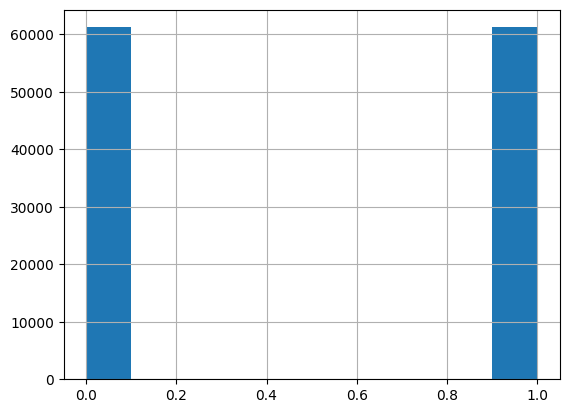

In [28]:
df_balanced['Vulnerability_status'].hist()

In [29]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,4284996,NaN,NaN,NaN,FileSystemEntry.textPaintFolder.setTextSize(n);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,FileSystemEntry.textPaintFolder.setTextSize(n);,NaN,NaN,NaN
1,2981173,NaN,NaN,NaN,if (this.field_570 == null) {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (this.field_570 == null) {,NaN,NaN,NaN
2,689318,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""HostAdapter"", ""Unknown host state encou...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"" + getConnectedSta...",NaN,NaN,NaN
3,315526,NaN,NaN,NaN,public static final String PREFERENCES_KEY_SCR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final String PREFERENCES_KEY_SCR...,NaN,NaN,NaN
4,3894497,NaN,NaN,NaN,"this.run(array, b, new String[0]);",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.run(array, b, new String[0]);",NaN,NaN,NaN


In [30]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,4284996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,FileSystemEntry.textPaintFolder.setTextSize(n);,NaN,NaN,NaN
1,2981173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (this.field_570 == null) {,NaN,NaN,NaN
2,689318,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"" + getConnectedSta...",NaN,NaN,NaN
3,315526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final String PREFERENCES_KEY_SCR...,NaN,NaN,NaN
4,3894497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.run(array, b, new String[0]);",NaN,NaN,NaN
5,3917909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"this.context.sendBroadcast(new Intent(""user_st...",broadcast,WARNING,Broadcast sent without receiverPermission
6,2219923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,for (MediaLink mediaLink : mediaLinks) {,NaN,NaN,NaN
7,2264183,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + tex);",NaN,NaN,NaN
8,3368129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,float[] arrf2 = arrf = new float[8];,NaN,NaN,NaN
9,1456453,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + accountBlacklist);",NaN,NaN,NaN


In [32]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
122472,2832832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.w(""user_str"", ""user_str"" + getStateLabel(M...",file,WARNING,Logging found
122473,4207699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.w(field_6282, ""user_str"");",file,WARNING,Logging found
122474,1434467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"HttpRequestKt.url$default(httpRequestBuilder, ...",NaN,NaN,NaN
122475,1098151,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File file = new File(Environment.getExternalSt...,NaN,NaN,NaN
122476,3172838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.berlin_vegan.bvapp.helpers;,NaN,NaN,NaN
122477,226038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class a implements Callable<Boolean> {,NaN,NaN,NaN
122478,1573759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Enumeration listOptions2 = ((OptionHandler) aS...,NaN,NaN,NaN
122479,1697624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.f114a = z;,NaN,NaN,NaN
122480,5099157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,op.e = a5[n4];,NaN,NaN,NaN
122481,1005442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.handler_.endElement(element);,NaN,NaN,NaN


In [33]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [34]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df_balanced.head()

,processed_code,Vulnerability_status
0,FileSystemEntry.textPaintFolder.setTextSize(n);,0
1,if (this.field_570 == null) {,0
2,"Log.e(""user_str"", ""user_str"" + getConnectedSta...",1
3,public static final String PREFERENCES_KEY_SCR...,0
4,"this.run(array, b, new String[0]);",0


In [36]:
df_balanced.columns = ['text', 'labels']

In [37]:
df_balanced.head(5)

,text,labels
0,FileSystemEntry.textPaintFolder.setTextSize(n);,0
1,if (this.field_570 == null) {,0
2,"Log.e(""user_str"", ""user_str"" + getConnectedSta...",1
3,public static final String PREFERENCES_KEY_SCR...,0
4,"this.run(array, b, new String[0]);",0


In [38]:
df_balanced.head(5)

,text,labels
0,FileSystemEntry.textPaintFolder.setTextSize(n);,0
1,if (this.field_570 == null) {,0
2,"Log.e(""user_str"", ""user_str"" + getConnectedSta...",1
3,public static final String PREFERENCES_KEY_SCR...,0
4,"this.run(array, b, new String[0]);",0


In [39]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset, DatasetDict

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 122482
    })
})

In [44]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [45]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [46]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 73489
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 24497
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 24496
    })
})

In [47]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [48]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [49]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [50]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/73489 [00:00<?, ? examples/s]

Map:   0%|          | 0/24497 [00:00<?, ? examples/s]

Map:   0%|          | 0/24496 [00:00<?, ? examples/s]

In [51]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
!pip install torchinfo

In [53]:
from torchinfo import summary

In [54]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [55]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [57]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00


In [58]:
import evaluate

In [59]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [60]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-60-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [61]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.123400,0.115234,{'accuracy': 0.9657903331156107},{'recall': 0.9639602993817117},{'precision': 0.9677393008820647},{'f1': 0.9658461036843822}
2,0.107200,0.128314,{'accuracy': 0.9696685173089484},{'recall': 0.9643670680117149},{'precision': 0.9749157003043013},{'f1': 0.9696126947773097}
3,0.089400,0.130616,{'accuracy': 0.9672599608099282},{'recall': 0.9768955418158152},{'precision': 0.9586460162861249},{'f1': 0.9676847449431863}
4,0.056700,0.136219,{'accuracy': 0.9706890920966689},{'recall': 0.9766514806378133},{'precision': 0.9653425538758443},{'f1': 0.9709640892914915}


Trainer is attempting to log a value of "{'accuracy': 0.9657903331156107}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9639602993817117}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9677393008820647}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9658461036843822}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9696685173089484}" of type <class 

TrainOutput(global_step=18376, training_loss=0.10331962790549398, metrics={'train_runtime': 6575.2264, 'train_samples_per_second': 44.707, 'train_steps_per_second': 2.795, 'total_flos': 7.734307338940416e+16, 'train_loss': 0.10331962790549398, 'epoch': 4.0})

In [62]:
outcome= trainer.predict(tokenized_datasets['test'])

In [63]:
print(outcome.metrics)

{'test_loss': 0.12270712107419968, 'test_accuracy': {'accuracy': 0.9734253173858023}, 'test_recall': {'recall': 0.9796724549419801}, 'test_precision': {'precision': 0.9671758206044849}, 'test_f1': {'f1': 0.973384030418251}, 'test_runtime': 153.3585, 'test_samples_per_second': 159.737, 'test_steps_per_second': 2.497}
